# Introduction to Machine Learning with NumPy
### Python Data Science & Analysis

## What is Statistical Learning?

The goal of statistical learning (ie., ML) is to be able to compute some unobservable $y$ from one or more observables $x$. 

Here, $y$ is a quantitiy we cannot observe in the future (ie., something we need to predict); and $x$ is always observable. 

We call $y$ the prediction **target** and $x$ the **features** of the observation.

### Examples

* Consider a cinema wishing to recommend a film at a ticket booth:
    * Predict $y : $ **FilmRating** from $x_{1 \dots N} : $ CustomerAge, CustomerTicketPrice, ...
* Consider an estate agency wishing to recommend a city to move to...
    * Predict  $y : $ **City** from $x_{1 \dots N} : $ Budget, PrefHouseSize, ...
* Consider an automated system diagnosing a health condition...
    * Predict  $y : $ **Condition** from $x_{1 \dots N} : $ ChestImage, ReportedSymptom1, ...
    

## Why is this a "statistical" process?

In practice any $y$ cannot be known for certain, as *many* unobservable variables contribute to its value. 

Eg., A customer's **FilmRating** is also a product of their **Hunger** when watching. 

The game is to obtain some *model*, $\hat{f}$ which estimates $y$ as best as possible from observable $x$s, 

$\hat{y} = \hat{f}(x)$

NB. Here the $\hat{}$  symbol means "estimating"; ie., we expect any individual prediction to be some ways off because of the effect of unmeasured variables -- but the *aggregate* predictions will be "accurate enough". 

## What is the set up of a Machine Learning problem?

* Predict $y : $ **FilmRating** from $x_{1 \dots N} : $ CustomerAge, CustomerTicketPrice, ...

In [1]:
import numpy as np

In [167]:
x_age = np.array([35, 19, 30, 68, 22])
x_price = np.array([12, 10, 8, 9, 12])

In [168]:
age_effect    = 0.08
price_effect  = 0.01
baseline_rating = 1.8

What is the maximum rating?

In [169]:
age_effect * 100 + price_effect * 20 + baseline_rating

10.0

What are all the ratings?

In [170]:
y_rating = age_effect * x_age   +   price_effect * x_price   +   baseline_rating

In [171]:
y_rating

array([4.72, 3.42, 4.28, 7.33, 3.68])

...the goal of machine learning, then, is for the algorithm to determine a "best" `age_effect`, `price_effect` and `baseline_rating`. 

These terms are called, "parmaters" of the model (, where model, here means the entire relationship). 

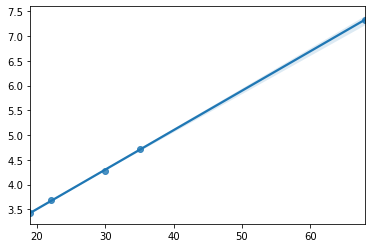

In [172]:
import seaborn as sns

sns.regplot(x=x_age, y=y_rating);

The points here are the values of $x_{age}$ and $y_{rating}$.. the line, is the solution to the machine learning problem. It is the line of *predictions* over the age range, for ratings. This line has been *inferred* from the dataset. 

As a formula, the line is $\hat{y} = \hat{f}(x; a, b) = ax + b$. 

Where $a$ is a fixed value, the slope of the line; and $b$ is the intercept. 

## How does NumPy compute $y$ from $x$ ?

In the following line `x_` are numpy arrays:

In [31]:
y_rating = age_effect * x_age   +    price_effect * x_price    +    baseline_rating

Note that the `*` and `+` have been run across all the elements of each (sometimes called "brodcasting").

In [32]:
y_rating

array([4.601, 3.321, 4.201, 7.241, 3.561])

## How do we create NumPy arrays?

We can convert python lists to numpy arrays:

In [35]:
x_age = np.array([35, 19, 30, 68, 22])

Or there are many helper methods for generating data, eg., over a range:

In [40]:
np.arange(18, 31)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

For simulating data we may want a random choice, here we select $10$ observations from the range $[12,80)$ (ie., 12 until 80).

In [53]:
np.random.choice(np.arange(12, 80), 10)

45.3617

NumPy chooses uniformly at random, so all numbers are equally likely... here we select $10,000$

In [60]:
np.random.choice(np.arange(12, 80), 10_000).mean()

45.5281

Since they are all equally likely, the mean is just the mean of the range:

In [57]:
(80 + 12)/2

46.0

The helper `np.random.uniform` does this directly:

In [61]:
np.random.uniform(12, 80, 10_000).mean()

45.967177607748994

## How do we make simulations more realistic?

When we observe, eg., ages of people in a cinema we don't see them arriving in a sequence; ie., we dont see all $12$ year olds, then all $13$, then $14$ etc. 

Nor are all ages equally likely. We don't see the same number of $80$ year olds as $12$ year olds. 

They will likely follow a normal pattern ("distribution"), ie.,  

* they have a mean (eg., $35$)
* the most common values are near the mean (eg., $35 \pm 15$)
    * NB. $\text{c. } 66\%$ are within a standard deivation of this mean
* values above and below the mean are as equally, decreasingly, common
    * eg., a $\text{c. } 5$ is about as common as $\text{c. } 65$
    


Let's generate $10$ observations according to this pattern:

In [81]:
np.random.normal(35, 15, 10).round()

array([ 8., 41., 16., 30., 59., 39., 52., 63., 48., 40.])

And now, $10,000$

In [84]:
n_customers = 1_000

x_age   = np.random.normal(35, 15, n_customers).round()

## How do you generate variables which depend on others?

Let's generate ticket prices.

This is more deterministic, as there is a base price (eg., $£10$), but..
* people over 65 sometimes get a discount
* people under 18 sometimes get a discount
* people sometimes buy a VIP ticket

How many people are over 65?

In [100]:
n_65 = (x_age >= 65).sum()
n_65

27

In [102]:
n_18 = (x_age <= 18).sum()
n_18

130

What percentage are over 65?

In [90]:
(x_age >= 65).mean()

0.027

Under 18?

In [111]:
(x_age <= 18).mean()

0.13

In [161]:
x_price65 = np.random.choice([10, 8], n_65, p=(0.6, 0.4))
x_price18 = np.random.choice([10, 8], n_18, p=(0.2, 0.8))
x_price00 = np.random.choice([10, 12], n_customers - n_65 - n_18, p=(0.95, 0.05))

In [162]:
x_price = np.zeros(n_customers)
x_price[x_age >= 65] = x_price65
x_price[x_age <= 18] = x_price18
x_price[ (x_age < 65) & (x_age > 18) ] = x_price00

In [163]:
x_price.mean()

9.89

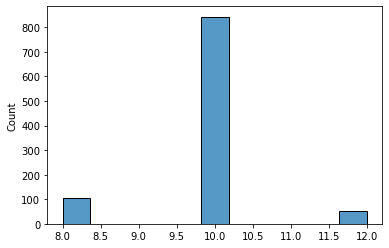

In [164]:
sns.histplot(x_price);

## How do we select values in NumPy arrays?

## Appendix

## Why are Normal Distributions common?

    
Normal distributions "arise naturally" when a variable is a product of many independent factors. Eg., consider a room temp vs., a theormostat dial. This is not a normal distribution, as the room temp is essentially entirely determined by the thermostat.

However if you look at the temp fluctations without changing the dial, ie., very small ones, these are normal. As eg., they are caused by small air movements (wind); people moving around; hot/cold air mixing; etc. ie., many independent factors. 